In [35]:
import pandas as pd
import os
from os import listdir
import numpy as np
import matplotlib.pyplot as plt

In [36]:
listdir("./")

['.ipynb',
 '.ipynb_checkpoints',
 'code',
 'codeplotten.py',
 'codetest.py',
 'CPC.csv',
 'CPC.ipynb',
 'Das',
 'DOS _0.5_and_1_on_PMDS.csv',
 'Dos.csv',
 'DOS.ipynb',
 'Dos_0.5and_1_on_Steel.csv',
 'Dos_0.5_and_1_on_PDMS.ipynb',
 'Dos_0.5_and_1_on_Steel_no_comments.csv',
 'DOS_staal_0.5_and_1.ipynb',
 'SDS.csv',
 'SDS.ipynb',
 'test.py',
 'triton.csv',
 'Triton.ipynb',
 'triton2.csv',
 'triton3.csv',
 'water_glas.csv',
 'water_glas.ipynb',
 'water_PDMS.csv',
 'water_staal.csv']

In [37]:
df = pd.read_csv("./DOS _0.5_and_1_on_PMDS.csv", sep = ";")
df["DOS_PMDS"].unique()

array([0.5, 1. ])

In [38]:
df

,DOS_PMDS,tijd,hoek,error
0,0.5,2,85.2,0.11
1,0.5,4,82.8,0.18
2,0.5,6,80.7,0.37
3,0.5,8,78.8,0.50
4,0.5,10,75.6,1.04
5,0.5,15,75.3,0.11
6,0.5,20,74.1,0.14
7,0.5,25,72.9,0.13
8,0.5,60,69.3,0.27
9,1.0,2,65.2,0.04


In [46]:
df_list = list()
for conc in df["DOS_PMDS"].unique():
    df_list.append(df[df["DOS_PMDS"] == conc])

In [48]:
data_dict = dict()
for frame in df_list:
    time = frame["tijd"]
    angle = frame["hoek"]
    error = frame["error"]
    data_dict[frame["DOS_PMDS"].unique()[0]] = (time,angle,error)

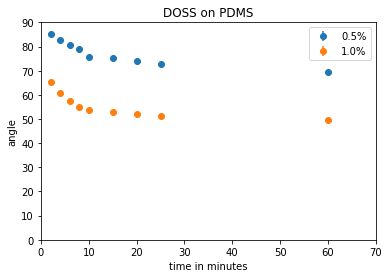

In [54]:
for name, values in data_dict.items():
    plt.errorbar(values[0],values[1],values[2], linestyle = "None", label = f"{name}%", marker = "o")
    
plt.legend()
plt.xlim(0,70)
plt.ylim(0,90)

plt.xlabel('time in minutes')
plt.ylabel('angle')


plt.title('DOSS on PDMS')
plt.savefig('DOSS on PDMS')

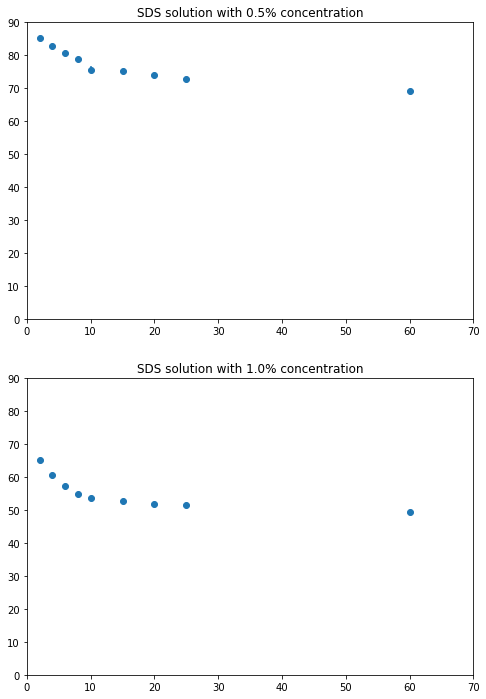

In [51]:
n_sets = 2

fig,ax = plt.subplots(n_sets,1, figsize = (8,12))
ax_idx = 0

for name, values in data_dict.items():
    ax[ax_idx].errorbar(values[0],values[1],values[2], linestyle = "None", label = f"{name}%", marker = "o")
    ax[ax_idx].set_xlim(0,70)
    ax[ax_idx].set_ylim(0,90)
    ax[ax_idx].set_title(f"SDS solution with {name}% concentration")
    ax_idx += 1

